<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Projeto_com_Machine_Learning_com_dados_de_factoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Análise exploratória dos dados da empresa

In [6]:
# 1. Lendo o arquivo .csv
dados_clientes = pd.read_csv('clientes_dataset.csv')
dados_clientes.head()

,cliente_id,total_atraso_dias,total_pagamentos,setor_de_atuacao,idade,limite_credito,inadimplente
0,1,30,5000,Financeiro,35,10000,1
1,2,10,8000,Varejo,28,8000,0
2,3,5,3000,Indústria,42,12000,0
3,4,50,2000,Serviços,50,5000,1
4,5,20,6000,Varejo,31,9000,1


In [7]:
dados_clientes.dtypes

cliente_id            int64
total_atraso_dias     int64
total_pagamentos      int64
setor_de_atuacao     object
idade                 int64
limite_credito        int64
inadimplente          int64
dtype: object

##

In [13]:
# 2. Pré-processamento de Dados
dados_clientes.dropna()
dados_clientes = pd.get_dummies(dados_clientes, columns=['setor_de_atuacao'])

In [14]:
# 3. Engenharia de Recursos
dados_clientes['atraso_medio_pagamento'] = dados_clientes['total_atraso_dias'] / dados_clientes['total_pagamentos']

# 4. Seleção e Treinamento de Modelo
X = dados_clientes.drop('inadimplente', axis=1)
y = dados_clientes['inadimplente']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Ajuste e Otimização de Hiperparâmetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# 6. Avaliação do Modelo Otimizado
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print(f"Acurácia do modelo otimizado: {accuracy}")
print(f"Relatório de Classificação do modelo otimizado:\n{report}")




Melhores hiperparâmetros encontrados: {'C': 1}
Acurácia do modelo otimizado: 0.75
Relatório de Classificação do modelo otimizado:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



## Análise avançada dos dados

In [8]:
# Análise descritiva básica
summary = dados_clientes.describe()
print(summary)


       cliente_id  total_atraso_dias  total_pagamentos      idade  \
count    20.00000          20.000000         20.000000  20.000000   
mean     10.50000          20.500000       4650.000000  36.500000   
std       5.91608          14.434972       2086.169999   9.005846   
min       1.00000           2.000000       1800.000000  22.000000   
25%       5.75000           9.500000       2900.000000  29.750000   
50%      10.50000          16.500000       4500.000000  36.000000   
75%      15.25000          30.000000       6000.000000  42.500000   
max      20.00000          50.000000       9000.000000  55.000000   

       limite_credito  inadimplente  setor_de_atuacao_Financeiro  \
count       20.000000     20.000000                    20.000000   
mean      8650.000000      0.500000                     0.250000   
std       2707.591666      0.512989                     0.444262   
min       4500.000000      0.000000                     0.000000   
25%       6800.000000      0.000000   

## Visualização dos dados com Matplotlib e Seaborn

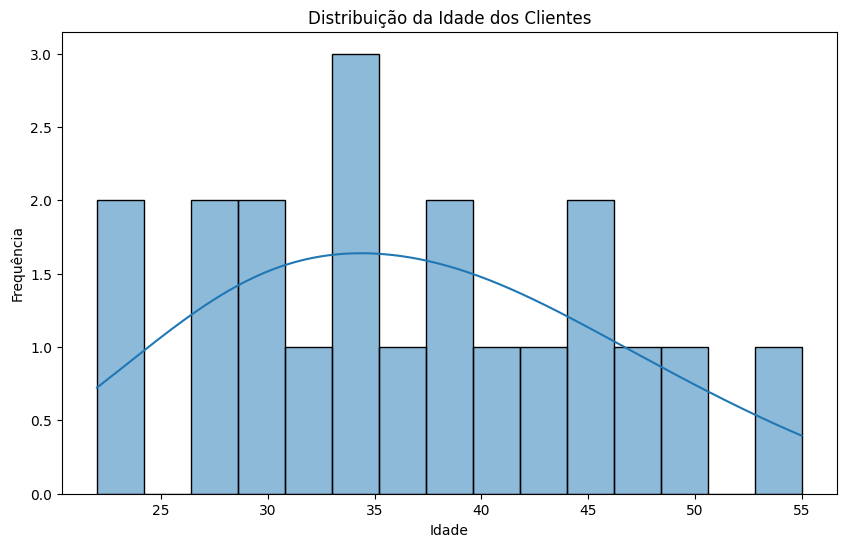

In [12]:
# Distribuição da idade dos clientes
plt.figure(figsize=(10, 6))
sns.histplot(dados_clientes['idade'], bins=15, kde=True)
plt.title('Distribuição da Idade da e dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

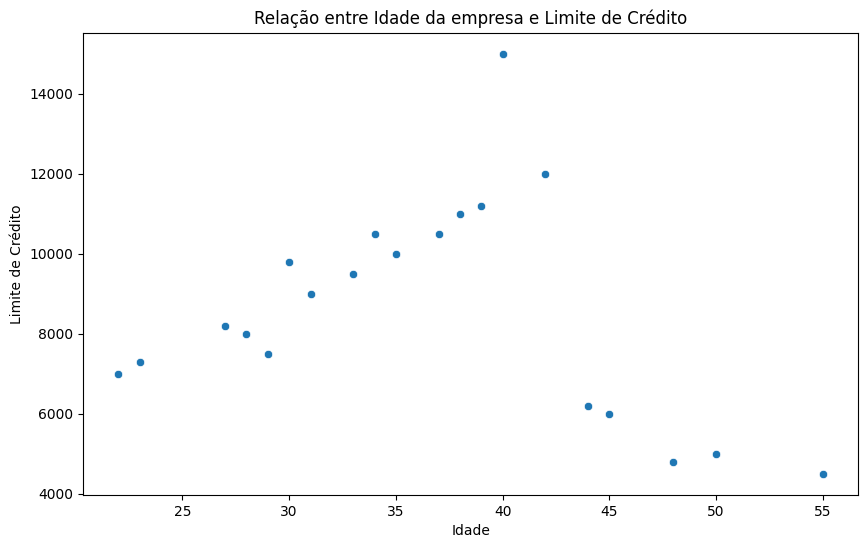

In [15]:
# Relação entre idade e limite de crédito
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='limite_credito', data=dados_clientes)
plt.title('Relação entre Idade da empresa e Limite de Crédito')
plt.xlabel('Idade')
plt.ylabel('Limite de Crédito')
plt.show()

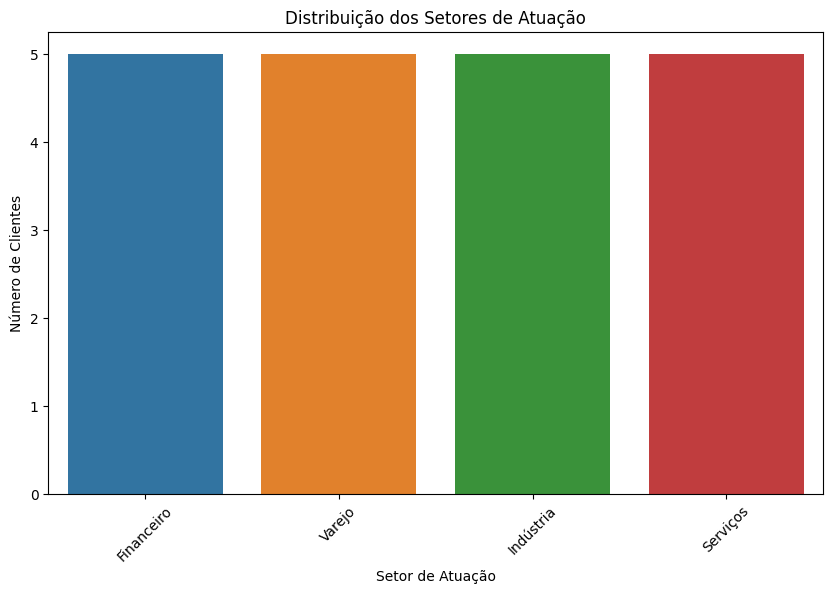

In [8]:


plt.figure(figsize=(10, 6))
sns.countplot(x='setor_de_atuacao', data=dados_clientes)
plt.title('Distribuição dos Setores de Atuação')
plt.xlabel('Setor de Atuação')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()


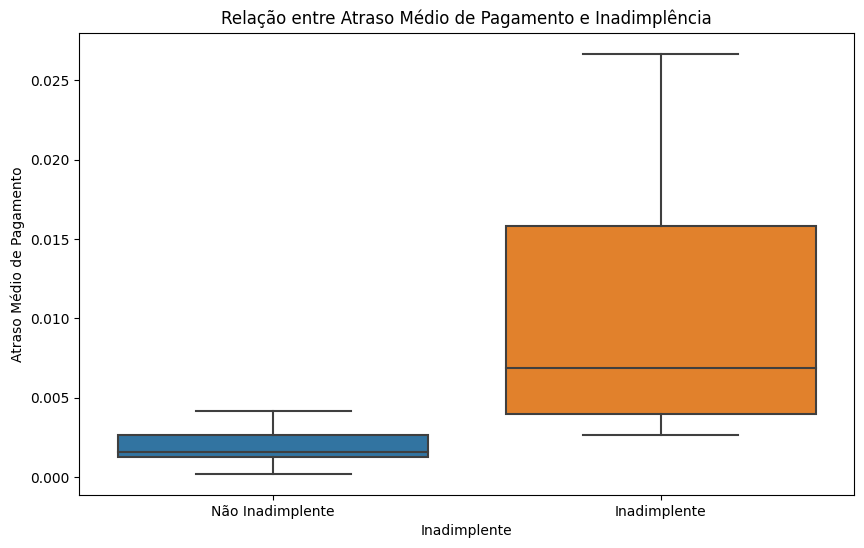

In [10]:
# Relação entre atraso médio de pagamento e inadimplência
dados_clientes['atraso_medio_pagamento'] = dados_clientes['total_atraso_dias'] / dados_clientes['total_pagamentos']
plt.figure(figsize=(10, 6))
sns.boxplot(x='inadimplente', y='atraso_medio_pagamento', data=dados_clientes)
plt.title('Relação entre Atraso Médio de Pagamento e Inadimplência')
plt.xlabel('Inadimplente')
plt.ylabel('Atraso Médio de Pagamento')
plt.xticks([0, 1], ['Não Inadimplente', 'Inadimplente'])
plt.show()

## Usando o Random Forest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Vamos usar hot encoding para converter variáveis categóricas em numéricas
dados_clientes = pd.get_dummies(dados_clientes, columns=['setor_de_atuacao'])


# Separar as features (X) da variável alvo (y)
X = dados_clientes.drop('inadimplente', axis=1)
y = dados_clientes['inadimplente']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 0.75
